# Machine Learning Classification Algorithms in Python with Scikit-learn

# Md. Manir Uddin

# Introduction
Machine learning is a research field in computer science, artificial intelligence, and statistics. The focus of machine learning is to train algorithms to learn patterns and make predictions from data. Machine learning is especially valuable because it lets us use computers to automate decision-making processes.


We’ll find machine learning applications everywhere. Netflix and Amazon use machine learning to make new product recommendations. Banks use machine learning to detect fraudulent activity in credit card transactions, and healthcare companies are beginning to use machine learning to monitor, assess, and diagnose patients.


In this tutorial, we’ll implement a simple machine learning algorithm in Python using Scikit-learn, a machine learning tool for Python. Using a database of https://www.kaggle.com/raghupalem/bill_authentication/downloads/bill_authentication.zip/1 

information, we’ll use Logistic Regression,Decision Tree, GradientBoosting, KNeighbors, Support Vector Machines (SVM), Naive Bayes (NB), Random Forest, XGB and Neural Network using Keras  classifer that predicts whether or not a bank note is authentic or fake.

By the end of this tutorial, we’ll know how to build our very own machine learning model in Python.

## Step #1: Problem Statement and Business Case
In this section we will predict whether a bank note is authentic or fake depending upon the four different attributes of the image of the note. The attributes are Variance of wavelet transformed image, curtosis of the image, entropy, and skewness of the image.

The dataset for this task can be downloaded from this link:
https://www.kaggle.com/raghupalem/bill_authentication/downloads/bill_authentication.zip/1

## Step #2 Import libraries

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
# Load dataset
dataset=pd.read_csv("bill_authentication.csv")

In [3]:
## Data Analysis
dataset.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
dataset.tail()

,Variance,Skewness,Curtosis,Entropy,Class
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


In [5]:
dataset.keys()

Index(['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class'], dtype='object')

In [6]:
print(dataset['Class'])

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
1342    1
1343    1
1344    1
1345    1
1346    1
1347    1
1348    1
1349    1
1350    1
1351    1
1352    1
1353    1
1354    1
1355    1
1356    1
1357    1
1358    1
1359    1
1360    1
1361    1
1362    1
1363    1
1364    1
1365    1
1366    1
1367    1
1368    1
1369    1
1370    1
1371    1
Name: Class, Length: 1372, dtype: int64


## Step #3: Visualizing the Data using Searbon

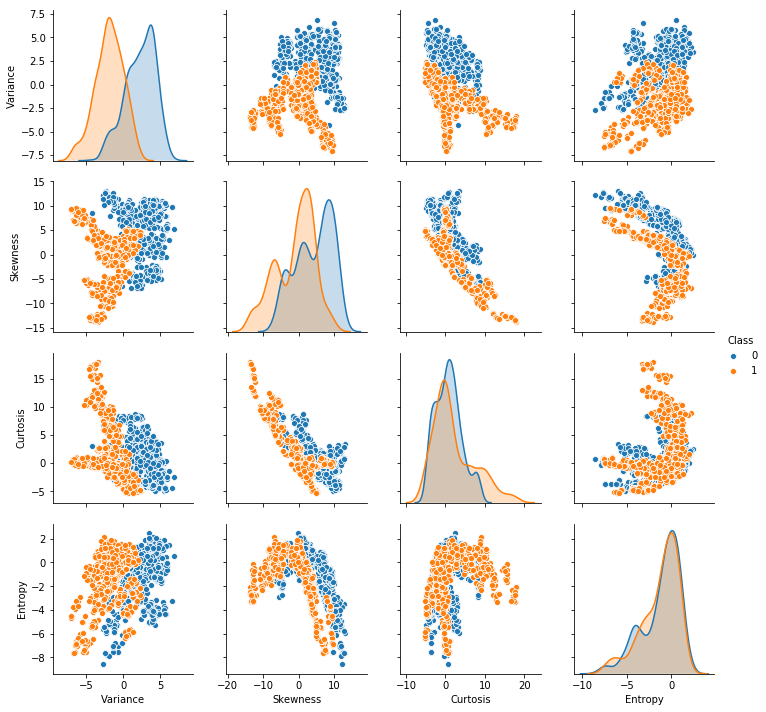

In [7]:
sns.pairplot(dataset, hue = 'Class', vars = ['Variance', 'Skewness', 'Curtosis', 'Entropy'] )

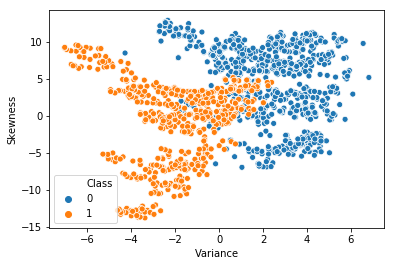

In [8]:
sns.scatterplot(x ='Variance', y ='Skewness', hue = 'Class', data = dataset)

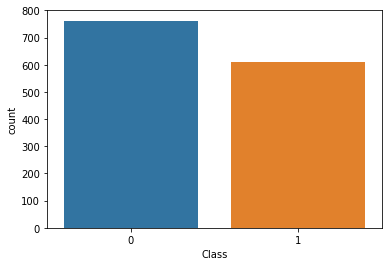

In [9]:
sns.countplot(dataset['Class'], label = "Count")

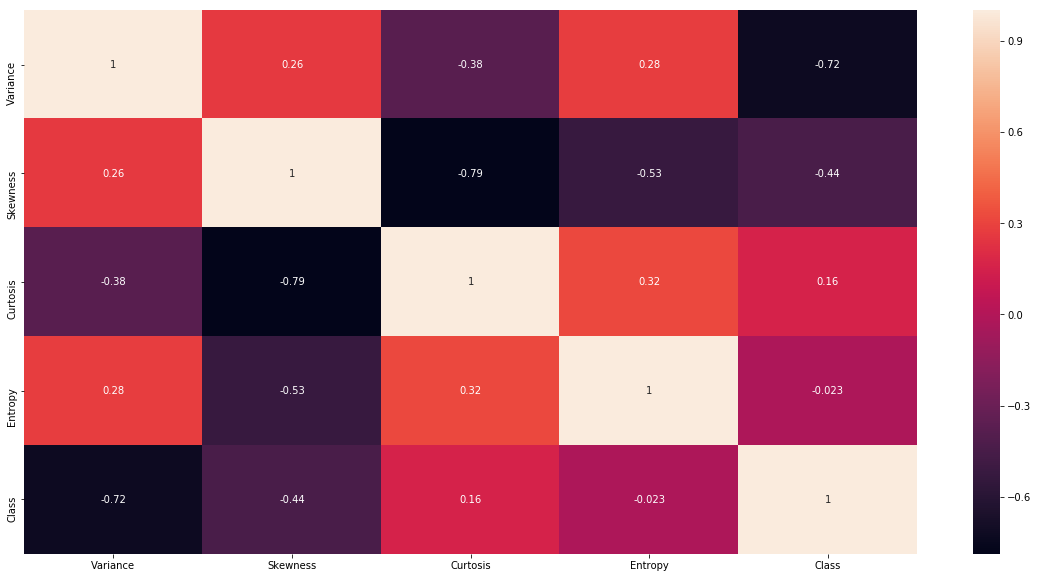

In [10]:
# Let's check the correlation between the variables 
plt.figure(figsize=(20,10))
sns.heatmap(dataset.corr(), annot=True)

We must separate the columns (attributes or features) of the dataset into input patterns (X) and output patterns (y). We can do this easily by specifying the column indices in the NumPy array format.

In [11]:
# split data into X and y
X=dataset.iloc[:,0:4].values
y=dataset.iloc[:,4].values

In [12]:
# split data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In the code above, the test_size parameter specifies the ratio of the test set, which we use to split up 30% of the data in to the test set and 70% for training.

In [13]:
## feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## Step # 4 : Building and Evaluating the Model

## LogisticRegression

The fit method of this class is called to train the algorithm on the training data, which is passed as parameter to the fit method. Execute the following script to train the algorithm:

In [14]:
# fit model
from sklearn.linear_model import LogisticRegression

# Initialize classifier
lr=LogisticRegression()

# Train our classifier
lr.fit(X_train,y_train)

C:\Users\Manir Uddin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
## make predictions for test data
y_pred=lr.predict(X_test)
predictions=[round(value) for value in y_pred]


## Step # 5 : Evaluating the Model’s Accuracy

In [16]:
# evaluate predictions
cm=confusion_matrix(y_test,predictions)
print(cm)

accuracy=accuracy_score(y_test,predictions)
print(" Accuracy is : %0.2f%%"%(accuracy*100))

[[225   7]
 [  0 180]]
 Accuracy is : 98.30%


As we see in the output, the LR classifier is 98.30% accurate. This means that 98.30% percent of the time the classifier is able to make the correct prediction. 

## DecisionTree Classifier

In [17]:
# fit model 
from sklearn.tree import DecisionTreeClassifier

# Initialize classifier
DTC=DecisionTreeClassifier()

# Train our classifier
DTC.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [18]:
## make predictions for test data
y_pred=DTC.predict(X_test)
predictions=[round(value) for value in y_pred]

In [19]:
# evaluate predictions
cm=confusion_matrix(y_test,predictions)
print(cm)

accuracy=accuracy_score(y_test,predictions)
print(" Accuracy is : %0.2f%%"%(accuracy*100))

[[226   6]
 [  3 177]]
 Accuracy is : 97.82%


## GradientBoosting Classifier

In [20]:
# model fit
from sklearn.ensemble import GradientBoostingClassifier

# Initialize classifier
GBC=GradientBoostingClassifier()

# Train our classifier
GBC.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [21]:
## make prediction for test data
y_pred=GBC.predict(X_test)
predictions=[round(value) for value in y_pred]



In [22]:
# evaluate predictions
cm=confusion_matrix(y_test,predictions)
print(cm)

accuracy=accuracy_score(y_test,predictions)
print(" Accuracy is : %0.2f%%"%(accuracy*100))

[[230   2]
 [  1 179]]
 Accuracy is : 99.27%


## KNeighbors Classifier

In [23]:
# fit model 
from sklearn.neighbors import KNeighborsClassifier

# Initialize classifier
KNC=KNeighborsClassifier()

# Train our classifier
KNC.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [24]:
## make predicton for test data
y_pred=KNC.predict(X_test)
predictions=[round(value) for value in y_pred]


In [25]:
# evaluate predictions
cm=confusion_matrix(y_test,predictions)
print(cm)

accuracy=accuracy_score(y_test,predictions)
print(" Accuracy is : %0.2f%%"%(accuracy*100))

[[231   1]
 [  0 180]]
 Accuracy is : 99.76%


## Support Vector Machines (SVM)

In [26]:
# fit model 
from sklearn.svm import SVC

# Initialize classifier
Classifier=SVC(random_state=20)

# Train our classifier
Classifier.fit(X_train,y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=20,
    shrinking=True, tol=0.001, verbose=False)

In [27]:
## make predictions for test data set
y_pred=Classifier.predict(X_test)
predictions=[round(value) for value in y_pred]

In [28]:
# evaluate predictions
cm=confusion_matrix(y_test,predictions)
print(cm)

accuracy=accuracy_score(y_test,predictions)
print(" Accuracy is : %0.2f%%"%(accuracy*100))

[[232   0]
 [  0 180]]
 Accuracy is : 100.00%


## Naive Bayes Algorithm

In [29]:
from sklearn.naive_bayes import GaussianNB

# Initialize classifier
Classifier=GaussianNB()

# Train our classifier
Classifier.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [30]:
## make predictions for test data
y_pred=Classifier.predict(X_test)
predictions=[round(value) for value in y_pred]

In [31]:
# evaluate predictions
cm=confusion_matrix(y_test,predictions)
print(cm)

accuracy=accuracy_score(y_test,predictions)
print(" Accuracy is : %0.2f%%"%(accuracy*100))

[[199  33]
 [ 36 144]]
 Accuracy is : 83.25%


## Random Forest

In [32]:
## fit model 
from sklearn.ensemble import RandomForestClassifier

# Initialize classifier
forest=RandomForestClassifier(n_estimators=20, random_state=0)

# Train our classifier
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [33]:
## make predictions for test data
y_pred=forest.predict(X_test)
predictions=[round(value) for value in y_pred]


In [34]:
# evaluate predictions
cm=confusion_matrix(y_test,predictions)
print(cm)

accuracy=accuracy_score(y_test,predictions)
print(" Accuracy is : %0.2f%%"%(accuracy*100))

[[229   3]
 [  2 178]]
 Accuracy is : 98.79%


## XGB Classifier


In [35]:
## fit model
from xgboost import XGBClassifier

# Initialize classifier
Classifier=XGBClassifier()

# Train our classifier
Classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [36]:
## make predictions for test data set 
y_pred=Classifier.predict(X_test)
predictions=[round(value) for value in y_pred]

In [37]:
# evaluate predictions
cm=confusion_matrix(y_test,predictions)
print(cm)

accuracy=accuracy_score(y_test,predictions)
print(" Accuracy is : %0.2f%%"%(accuracy*100))

[[199  33]
 [ 36 144]]
 Accuracy is : 83.25%


## Neural Network using Keras for Classification


In [38]:
from keras  import Sequential
from keras.layers import Dense
classifier=Sequential()


Using TensorFlow backend.


In [39]:
#First Hidden Layer 
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal', input_dim=4))
#Second  Hidden Layer 
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
#Output Layer 
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
#Compiling the neural network 
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy']) 

In [40]:
classifier.fit(X_train,y_train, batch_size=10,epochs=5)

Epoch 1/5
960/960 [==============================] - 2s 2ms/step - loss: 0.6912 - acc: 0.5854
Epoch 2/5
960/960 [==============================] - 0s 105us/step - loss: 0.6731 - acc: 0.8375
Epoch 3/5
960/960 [==============================] - 0s 106us/step - loss: 0.6064 - acc: 0.9229
Epoch 4/5
960/960 [==============================] - 0s 117us/step - loss: 0.5147 - acc: 0.9302
Epoch 5/5
960/960 [==============================] - 0s 119us/step - loss: 0.4390 - acc: 0.9479


In [41]:
# eval_model=classifier.evaluate(X_train, y_train) 

## make predictions for test data set 
y_pred=classifier.predict(X_test) 
y_pred =(y_pred>0.5) 


# evaluate predictions
cm = confusion_matrix(y_test, y_pred) 
print(cm) 
accuracy=accuracy_score(y_test,y_pred) 
print("Accuracy: %.2f%%" % (accuracy*100.0))

[[209  23]
 [  0 180]]
Accuracy: 94.42%


#  Conclusion
In this tutorial, we learned how to build a machine learning classifier in Python. Now we can load data, organize data, train, predict, and evaluate machine learning classifiers in Python using Scikit-learn. 